## Read Features and Labels for Paragraph (title and summary)

In [1]:
import pandas as pd

# Read the three CSV files
df1 = pd.read_csv("concatenated_results_Paragraph_title_COUNTERFACTUAL.csv")    # Original features
df2 = pd.read_csv("concatenated_results_Paragraph_title_R1.csv") # Resampling 1

df4 = pd.read_csv("concatenated_results_Paragraph_summary_COUNTERFACTUAL.csv")    # Original features
df5 = pd.read_csv("concatenated_results_Paragraph_summary_R1.csv") # Resampling 1

# Drop source_file and file_path columns from df2 and df3
df2 = df2.drop(['label', 'source_file', 'file_path'], axis=1)
df5 = df5.drop(['label', 'source_file', 'file_path'], axis=1)

# Rename columns
df2.columns = [f"{col}_R1" for col in df2.columns]
df5.columns = [f"{col}_R1" for col in df5.columns]

# Verify dimensions
print("Dimensions of dataframes:")
print(f"DF1: {df1.shape}")
print(f"DF2: {df2.shape}")
# print(f"DF3: {df3.shape}")
print(f"DF4: {df4.shape}")
print(f"DF5: {df5.shape}")
# print(f"DF6: {df6.shape}")

print("Missing labels:", df1['Final_label'].isna().sum())


# # Concatenate horizontally using pd.concat with axis=1
df_combined_title = pd.concat([df2, df1], axis=1)
df_combined_summary = pd.concat([df5, df4], axis=1)

# # Verify final dimensions
print(f"\nFinal DataFrame dimensions: {df_combined_title.shape}")
print(f"\nFinal DataFrame dimensions: {df_combined_summary.shape}")

Dimensions of dataframes:
DF1: (1500, 685)
DF2: (1500, 680)
DF4: (1500, 685)
DF5: (1500, 680)
Missing labels: 300

Final DataFrame dimensions: (1500, 1365)

Final DataFrame dimensions: (1500, 1365)


In [2]:
# 1. Print initial information
print("Initial shape:", df_combined_title.shape, df_combined_summary.shape)
print("Missing labels:", df_combined_title['Final_label'].isna().sum(), df_combined_summary['Final_label'].isna().sum())

Initial shape: (1500, 1365) (1500, 1365)
Missing labels: 300 352


In [3]:
df_combined_title.head()

model_1_gold_lp_median_R1  model_1_gold_lp_max_R1  model_1_gold_lp_min_R1  \
0                  -0.001695                     0.0               -6.559650   
1                  -0.000009                     0.0               -5.760087   
2                  -0.011849                     0.0               -5.908032   
3                  -0.000036                     0.0             -100.000000   
4                  -0.000037                     0.0              -13.408762   

   model_1_gold_lp_std_R1  model_1_gold_lp_moment1_R1  \
0                1.152805                   -0.398595   
1                0.703820                   -0.232701   
2                0.540387                   -0.208765   
3                4.432078                   -0.370896   
4                1.054486                   -0.250051   

   model_1_gold_lp_moment2_R1  model_1_gold_lp_moment3_R1  \
0                    1.310242                   -6.291794   
1                    0.492082                   -1.926456   
2                    0.291447                   -0.912797   
3                   19.604948                -1931.638749   
4                    1.109769                  -11.531637   

   model_1_gold_lp_moment4_R1  model_1_gold_lp_moment5_R1  \
0                   35.730285               -2.068079e+02   
1                    9.581143               -4.953504e+01   
2                    4.097001               -2.019141e+01   
3               192431.436750               -1.917172e+07   
4                  140.903673               -1.756514e+03   

   model_1_gold_lp_q95_R1  ...  kl_4_vs_6_q80  kl_4_vs_6_q20  kl_4_vs_6_q15  \
0                     0.0  ...       0.162083   9.278088e-07   1.808164e-07   
1                     0.0  ...       0.200897   1.995831e-06   7.375400e-07   
2                     0.0  ...       0.250250   2.717512e-04   3.080094e-05   
3                     0.0  ...       0.193033   4.100509e-06   1.263467e-06   
4                     0.0  ...       0.185542   2.765694e-06   8.587689e-07   

   kl_4_vs_6_q10  kl_4_vs_6_q05          label            source_file  \
0   1.106378e-07   4.229955e-08           fact   logprob_matrix_1.csv   
1   2.668058e-07   3.143588e-08           fact  logprob_matrix_10.csv   
2   6.979164e-06   6.469386e-07  hallucination  logprob_matrix_11.csv   
3   2.637696e-07   3.475799e-08  hallucination  logprob_matrix_12.csv   
4   2.731429e-07   4.082680e-08  hallucination  logprob_matrix_13.csv   

                           file_path  counterfactual    Final_label  
0   NCT00001959/logprob_matrix_1.csv            fact           fact  
1  NCT00001959/logprob_matrix_10.csv            fact           fact  
2  NCT00001959/logprob_matrix_11.csv            fact       coverage  
3  NCT00001959/logprob_matrix_12.csv            fact       coverage  
4  NCT00001959/logprob_matrix_13.csv   hallucination  hallucination  

[5 rows x 1365 columns]

In [4]:
df_combined_summary.head()

model_1_gold_lp_median_R1  model_1_gold_lp_max_R1  model_1_gold_lp_min_R1  \
0               0.000000e+00                     0.0               -1.377347   
1              -2.980232e-07                     0.0               -9.638568   
2              -8.344647e-07                     0.0               -1.127519   
3               0.000000e+00                     0.0               -7.814702   
4              -7.688703e-05                     0.0               -5.217032   

   model_1_gold_lp_std_R1  model_1_gold_lp_moment1_R1  \
0                0.180827                   -0.023970   
1                1.850769                   -0.460547   
2                0.317373                   -0.164033   
3                0.921656                   -0.153386   
4                0.383573                   -0.167420   

   model_1_gold_lp_moment2_R1  model_1_gold_lp_moment3_R1  \
0                    0.032135                   -0.042726   
1                    3.303011                  -27.729144   
2                    0.094010                   -0.062320   
3                    0.837814                   -6.166792   
4                    0.146841                   -0.318099   

   model_1_gold_lp_moment4_R1  model_1_gold_lp_moment5_R1  \
0                    0.057843                   -0.078283   
1                  253.813079                -2326.495833   
2                    0.060282                   -0.056284   
3                   47.202762                 -361.577842   
4                    1.341207                   -6.490920   

   model_1_gold_lp_q95_R1  ...  kl_4_vs_6_q80  kl_4_vs_6_q20  kl_4_vs_6_q15  \
0                     0.0  ...       0.019408   6.957359e-07   3.180618e-07   
1                     0.0  ...       0.254785   7.169600e-05   2.824224e-05   
2                     0.0  ...       0.536783   1.409192e-04   1.123663e-04   
3                     0.0  ...       0.195337   1.136319e-06   6.168359e-07   
4                     0.0  ...       0.163484   6.523635e-05   1.996456e-05   

   kl_4_vs_6_q10  kl_4_vs_6_q05  label            source_file  \
0   2.052192e-07   1.287433e-08   fact   logprob_matrix_1.csv   
1   1.488498e-05   3.977073e-06   fact  logprob_matrix_10.csv   
2   8.786914e-05   7.300707e-05   fact  logprob_matrix_11.csv   
3   2.115952e-07   2.655602e-08   fact  logprob_matrix_12.csv   
4   7.435319e-06   2.005330e-06   fact  logprob_matrix_13.csv   

                           file_path  counterfactual  Final_label  
0   NCT00001959/logprob_matrix_1.csv            fact         fact  
1  NCT00001959/logprob_matrix_10.csv             NaN          NaN  
2  NCT00001959/logprob_matrix_11.csv            fact         fact  
3  NCT00001959/logprob_matrix_12.csv            fact         fact  
4  NCT00001959/logprob_matrix_13.csv            fact         fact  

[5 rows x 1365 columns]

In [5]:
# Concatenate the DataFrames
df_combined = pd.concat([df_combined_title, df_combined_summary], axis=0, ignore_index=True)

# Print sample of combined data
print("\nSample of combined data:")

# Print value counts for labels if they exist
if 'Final_label' in df_combined.columns:
    print("\nLabel distribution:")
    print(df_combined['Final_label'].value_counts(normalize=True))


Sample of combined data:

Label distribution:
Final_label
fact             0.650767
hallucination    0.174617
coverage         0.160136
error            0.014480
Name: proportion, dtype: float64


In [6]:
# 1. Print initial information
print("Initial shape:", df_combined.shape)
print("Missing labels:", df_combined['Final_label'].isna().sum())

Initial shape: (3000, 1365)
Missing labels: 652


## Clean Distribution

In [7]:
df_clean = df_combined.dropna()
df_clean = df_clean[~df_clean['Final_label'].isin(['coverage', 'error'])]
print(f"Original shape: {df_combined.shape}")
print(f"Shape after removing NaN labels: {df_clean.shape}")
print("\nLabel distribution in clean data:")
print(df_clean['Final_label'].value_counts())

Original shape: (3000, 1365)
Shape after removing NaN labels: (1938, 1365)

Label distribution in clean data:
Final_label
fact             1528
hallucination     410
Name: count, dtype: int64


## PCA

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Remove non-feature columns (label, source_file, file_path)
feature_columns = [col for col in df_clean.columns 
                  if col not in ['label', 'source_file', 'file_path', 'counterfactual', 'Final_label']]
X = df_clean[feature_columns]

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Create and fit PCA
# n_components=None means keep all components
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# 4. Print explained variance ratio
# print("Explained variance ratio:")
# print(pca.explained_variance_ratio_[:])  # First 10 components
print(f"\nCumulative variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_)[:20])  # Cumulative sum of first 10

# Optional: Create DataFrame with PCA results
pca_df = pd.DataFrame(
    X_pca, 
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
    index=df_clean.index
)

# Optional: Add back the label column
pca_df['label'] = df_clean['Final_label']


Cumulative variance ratio:
[0.24378429 0.43597457 0.55982181 0.58971634 0.61768007 0.64045666
 0.660833   0.67895321 0.69525839 0.71092371 0.72447395 0.73610871
 0.74743139 0.75780399 0.76711274 0.77588944 0.78446913 0.79246787
 0.79989356 0.80648723]



Variance Explained:
PC1: 0.244
PC2: 0.192
Total: 0.436


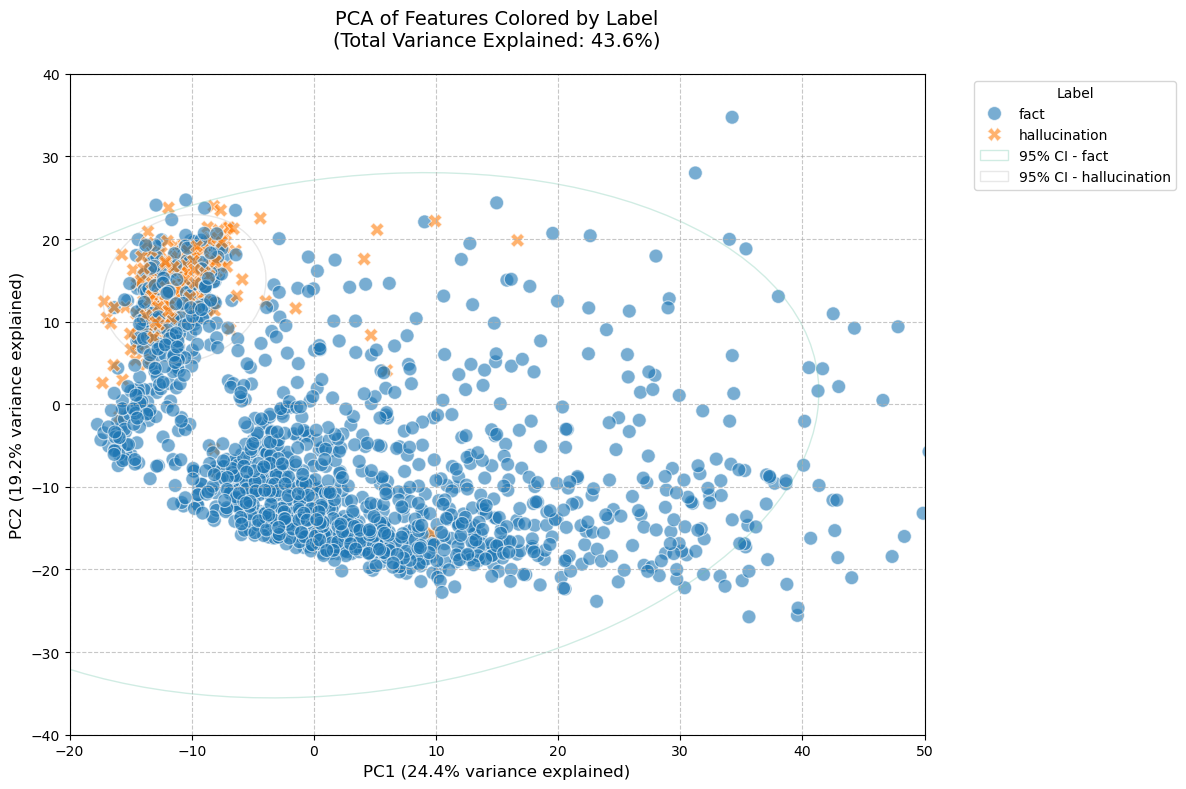

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Function to create confidence ellipses
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Set the style to a default matplotlib style
plt.style.use('default')

# Create figure with white background
plt.figure(figsize=(12, 8), facecolor='white')

# Create main scatter plot
scatter = sns.scatterplot(data=pca_df, 
                         x='PC1', 
                         y='PC2', 
                         hue='label',
                         style='label',
                         s=100,
                         alpha=0.6)

# Get current axis
ax = plt.gca()
ax.set_facecolor('white')

# Set axis limits
plt.xlim(-20, 50)
plt.ylim(-40, 40)

# Add confidence ellipses for each label
labels = pca_df['label'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))

for label, color in zip(labels, colors):
    mask = pca_df['label'] == label
    x = pca_df.loc[mask, 'PC1']
    y = pca_df.loc[mask, 'PC2']
    confidence_ellipse(x, y, ax, n_std=2.0, edgecolor=color, alpha=0.3, label=f'95% CI - {label}')

# Add title with variance explained
title = 'PCA of Features Colored by Label\n'
title += f'(Total Variance Explained: {sum(pca.explained_variance_ratio_[:2]):.1%})'
plt.title(title, fontsize=14, pad=20)

# Customize axes
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance explained)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance explained)', fontsize=12)

# Add legend with better positioning
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)


# # Set equal aspect ratio
# plt.axis('equal')

# Adjust layout
plt.tight_layout()

# Print variance explained
print(f"\nVariance Explained:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total: {sum(pca.explained_variance_ratio_[:2]):.3f}")

# Show plot
plt.show()

# Optionally save the plot
# plt.savefig('pca_visualization.png', dpi=300, bbox_inches='tight')

## 3D


Variance Explained:
PC1: 0.244
PC2: 0.192
PC3: 0.124
Total: 0.560


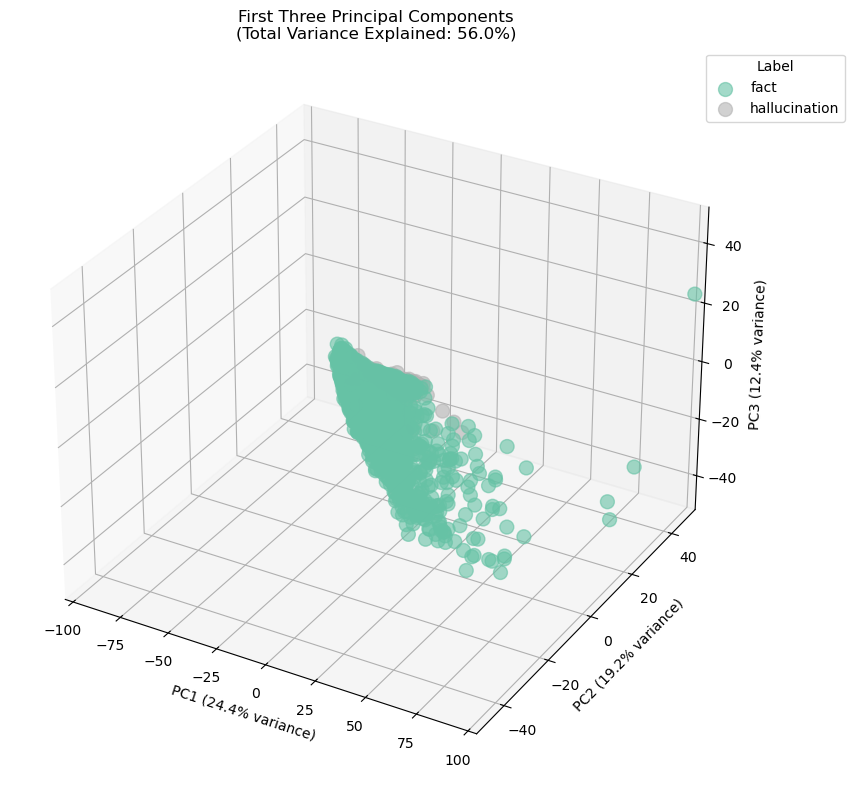

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set the style
plt.style.use('default')

# Create 3D figure
fig = plt.figure(figsize=(12, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Get unique labels and create color map
labels = pca_df['label'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))
color_dict = dict(zip(labels, colors))

# Plot each label with different color
for label in labels:
    mask = pca_df['label'] == label
    ax.scatter(pca_df.loc[mask, 'PC1'], 
              pca_df.loc[mask, 'PC2'], 
              pca_df.loc[mask, 'PC3'],
              c=[color_dict[label]],
              label=label,
              alpha=0.6,
              s=100)

# Set labels and title
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')

title = 'First Three Principal Components\n'
title += f'(Total Variance Explained: {sum(pca.explained_variance_ratio_[:3]):.1%})'
plt.title(title)

# Set axis limits
ax.set_xlim(-100, 100)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

# Add legend
ax.legend(title='Label', bbox_to_anchor=(1.15, 1))

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Print variance explained
print(f"\nVariance Explained:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"PC3: {pca.explained_variance_ratio_[2]:.3f}")
print(f"Total: {sum(pca.explained_variance_ratio_[:3]):.3f}")

# Show plot
plt.show()

# Optionally save the plot
# plt.savefig('pca_3d_visualization.png', dpi=300, bbox_inches='tight')


# Add these lines after creating the plot to make it interactive
ax.view_init(elev=20, azim=45)  # Set initial viewing angle
ax.dist = 12  # Set distance from plot

# Or make it rotate (optional)
for angle in range(0, 360, 5):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(0.1)

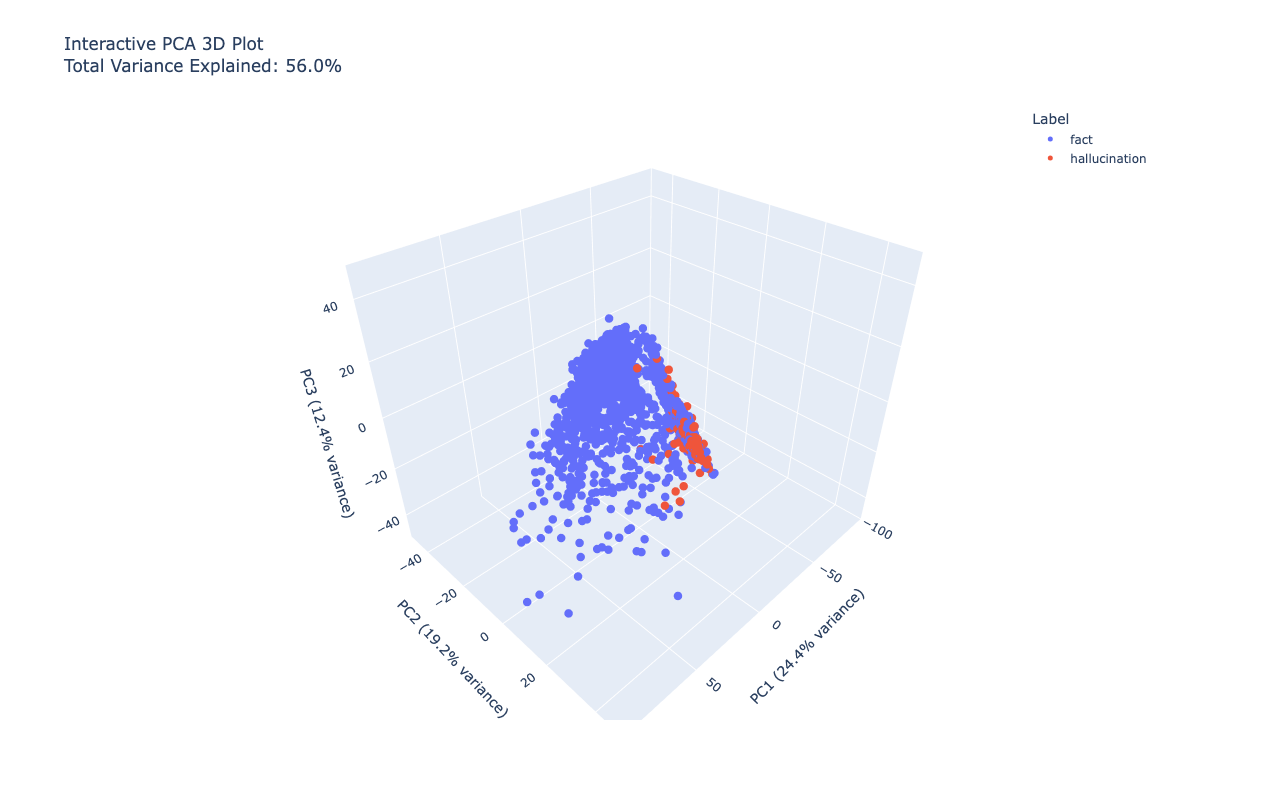

In [11]:
import plotly.express as px
import plotly.graph_objects as go

# Create DataFrame with first 3 PCs
plot_df = pca_df[['PC1', 'PC2', 'PC3', 'label']].copy()

# Create the 3D scatter plot
fig = px.scatter_3d(plot_df, 
                    x='PC1', 
                    y='PC2', 
                    z='PC3',
                    color='label',
                    title=f'Interactive PCA 3D Plot<br>Total Variance Explained: {sum(pca.explained_variance_ratio_[:3]):.1%}',
                    labels={
                        'PC1': f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
                        'PC2': f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
                        'PC3': f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)'
                    })

# Update layout
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-100, 100]),
        yaxis=dict(range=[-50, 50]),
        zaxis=dict(range=[-50, 50])
    ),
    width=1000,
    height=800,
    legend=dict(
        title='Label',
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.85
    )
)

# Update traces
fig.update_traces(
    marker=dict(size=5),
    hovertemplate="<br>".join([
        "PC1: %{x:.2f}",
        "PC2: %{y:.2f}",
        "PC3: %{z:.2f}",
        "Label: %{customdata}",
    ])
)

# Show plot
fig.show()

# Optionally save as HTML file
# fig.write_html("interactive_pca_3d.html")

## Random Forest

In [12]:
# 1. Print initial information
print("Initial shape:", df_clean.shape)
print("Missing labels:", df_clean['Final_label'].isna().sum())

Initial shape: (1938, 1365)
Missing labels: 0


Total number of unique NCT files: 100

Split Information:
Number of NCT files in training: 90
Number of NCT files in test: 10
Number of rows in training: 1726
Number of rows in test: 212

NCT numbers in test set: ['NCT00001959', 'NCT00448136', 'NCT00726986', 'NCT01226485', 'NCT01334723', 'NCT01338987', 'NCT01696968', 'NCT02684058', 'NCT03158220', 'NCT03271047']

Class distribution:
Training set:
 Final_label
fact             0.785632
hallucination    0.214368
Name: proportion, dtype: float64

Test set:
 Final_label
fact             0.811321
hallucination    0.188679
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

         fact       0.93      0.92      0.93       172
hallucination       0.68      0.70      0.69        40

     accuracy                           0.88       212
    macro avg       0.81      0.81      0.81       212
 weighted avg       0.88      0.88      0.88       212



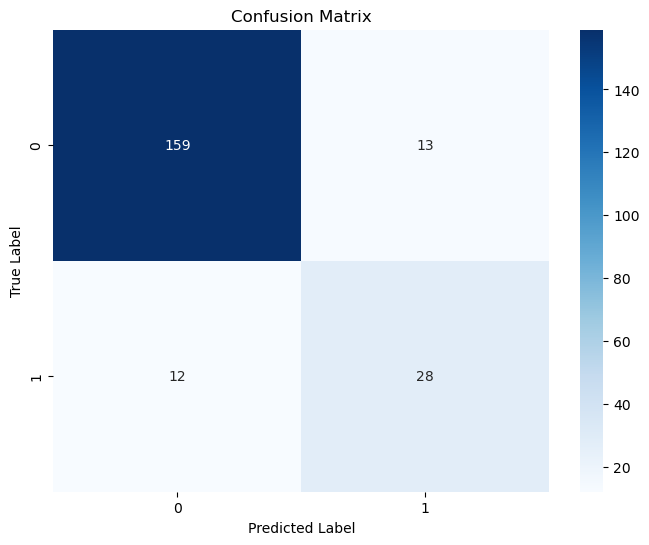

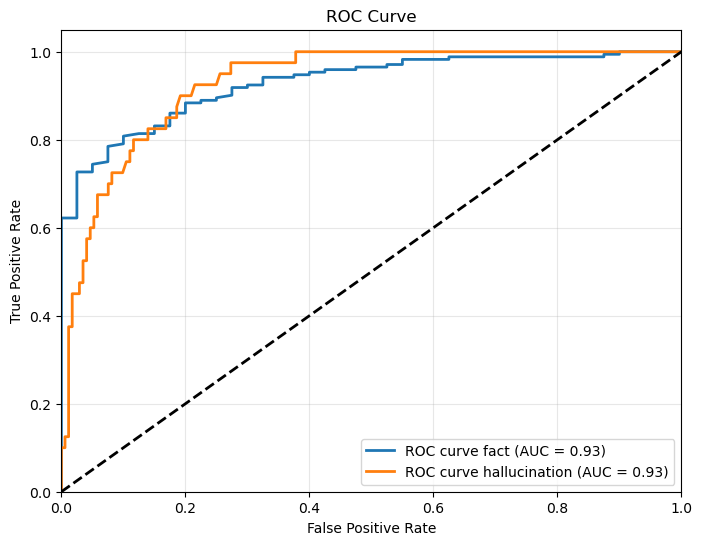

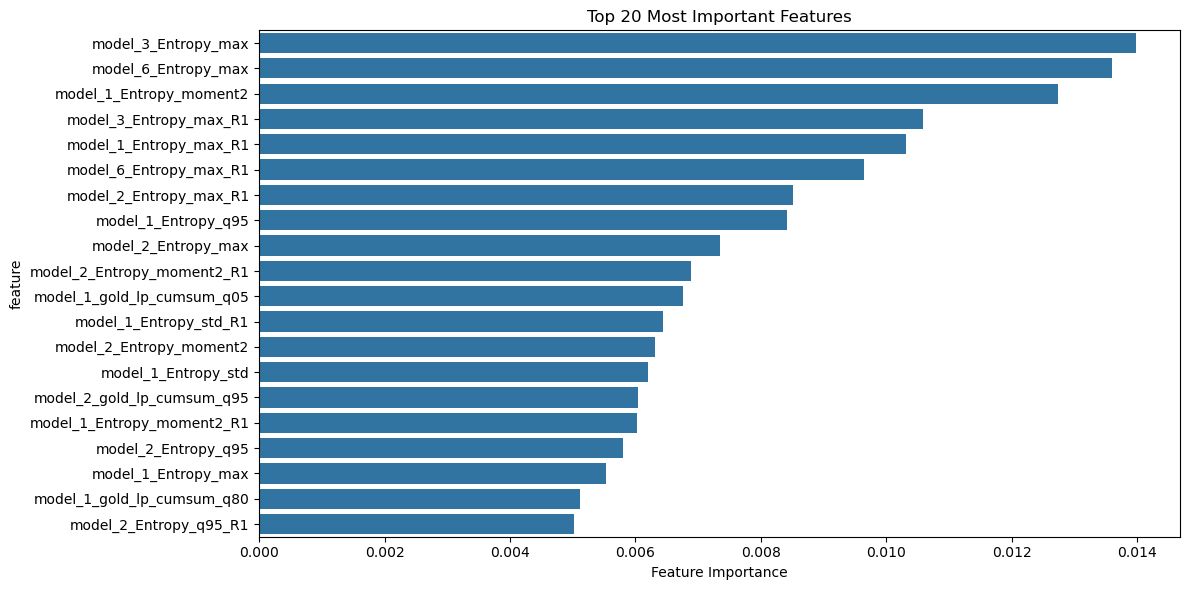


Results by NCT file:

NCT NCT03271047:
Total predictions: 16
Predictions distribution:
predicted
fact             0.9375
hallucination    0.0625
Name: proportion, dtype: float64

NCT NCT01696968:
Total predictions: 25
Predictions distribution:
predicted
fact             0.68
hallucination    0.32
Name: proportion, dtype: float64

NCT NCT02684058:
Total predictions: 26
Predictions distribution:
predicted
fact             0.846154
hallucination    0.153846
Name: proportion, dtype: float64

NCT NCT01338987:
Total predictions: 21
Predictions distribution:
predicted
fact             0.809524
hallucination    0.190476
Name: proportion, dtype: float64

NCT NCT01334723:
Total predictions: 7
Predictions distribution:
predicted
fact             0.857143
hallucination    0.142857
Name: proportion, dtype: float64

NCT NCT01226485:
Total predictions: 25
Predictions distribution:
predicted
fact             0.84
hallucination    0.16
Name: proportion, dtype: float64

NCT NCT00726986:
Total predictio

/tmp/ipykernel_324620/841282342.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extract unique NCT numbers
df_clean['nct_number'] = df_clean['file_path'].apply(lambda x: x.split('/')[0])
unique_ncts = df_clean['nct_number'].unique()

# Print total number of unique NCT files
print(f"Total number of unique NCT files: {len(unique_ncts)}")

# 2. Split NCT numbers into train/test (90/10)
np.random.seed(42)  # for reproducibility
test_ncts = np.random.choice(unique_ncts, size=int(len(unique_ncts)*0.1), replace=False)
train_ncts = np.array([nct for nct in unique_ncts if nct not in test_ncts])

# Create train and test sets
train_df = df_clean[df_clean['nct_number'].isin(train_ncts)]
test_df = df_clean[df_clean['nct_number'].isin(test_ncts)]

# 3. Prepare features and labels
X_train = train_df.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y_train = train_df['Final_label']
X_test = test_df.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y_test = test_df['Final_label']

# Print split information
print("\nSplit Information:")
print(f"Number of NCT files in training: {len(train_ncts)}")
print(f"Number of NCT files in test: {len(test_ncts)}")
print(f"Number of rows in training: {len(X_train)}")
print(f"Number of rows in test: {len(X_test)}")
print("\nNCT numbers in test set:", sorted(test_ncts))

# Print class distribution
print("\nClass distribution:")
print("Training set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

# 4. Create and train the model
rf_classifier = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

# 5. Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# 6. Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Plot ROC curve
plt.figure(figsize=(8, 6))
classes = rf_classifier.classes_

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_name, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 9. Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 10. Print results by NCT
print("\nResults by NCT file:")
test_df['predicted'] = y_pred
for nct in test_ncts:
    nct_results = test_df[test_df['nct_number'] == nct]
    print(f"\nNCT {nct}:")
    print(f"Total predictions: {len(nct_results)}")
    print("Predictions distribution:")
    print(nct_results['predicted'].value_counts(normalize=True))

## Logistic Regression

Original unique labels: ['fact' 'hallucination']

Training set size: 1550
Test set size: 388

Class distribution:
Training set:
 Final_label
fact             0.788387
hallucination    0.211613
Name: proportion, dtype: float64

Test set:
 Final_label
fact             0.78866
hallucination    0.21134
Name: proportion, dtype: float64

Model classes: ['fact' 'hallucination']

Classification Report:
               precision    recall  f1-score   support

         fact       0.93      0.93      0.93       306
hallucination       0.75      0.72      0.73        82

     accuracy                           0.89       388
    macro avg       0.84      0.83      0.83       388
 weighted avg       0.89      0.89      0.89       388



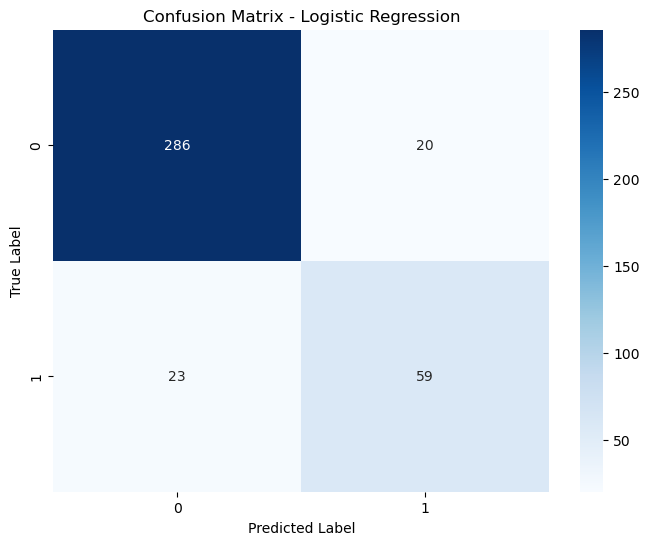

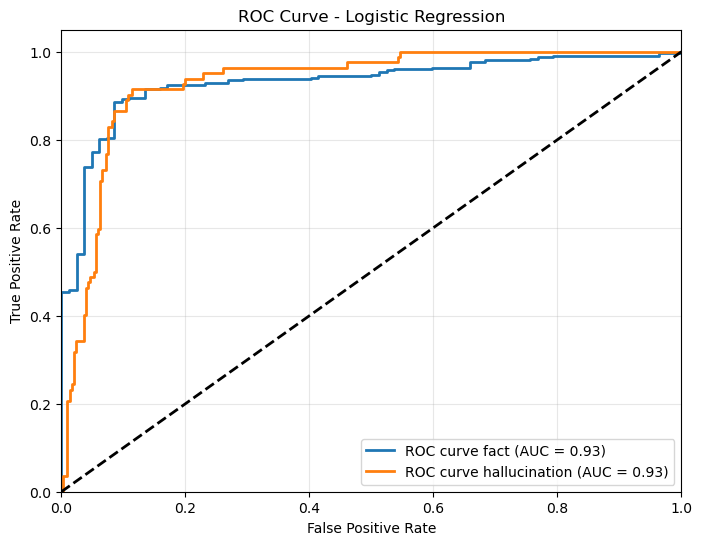

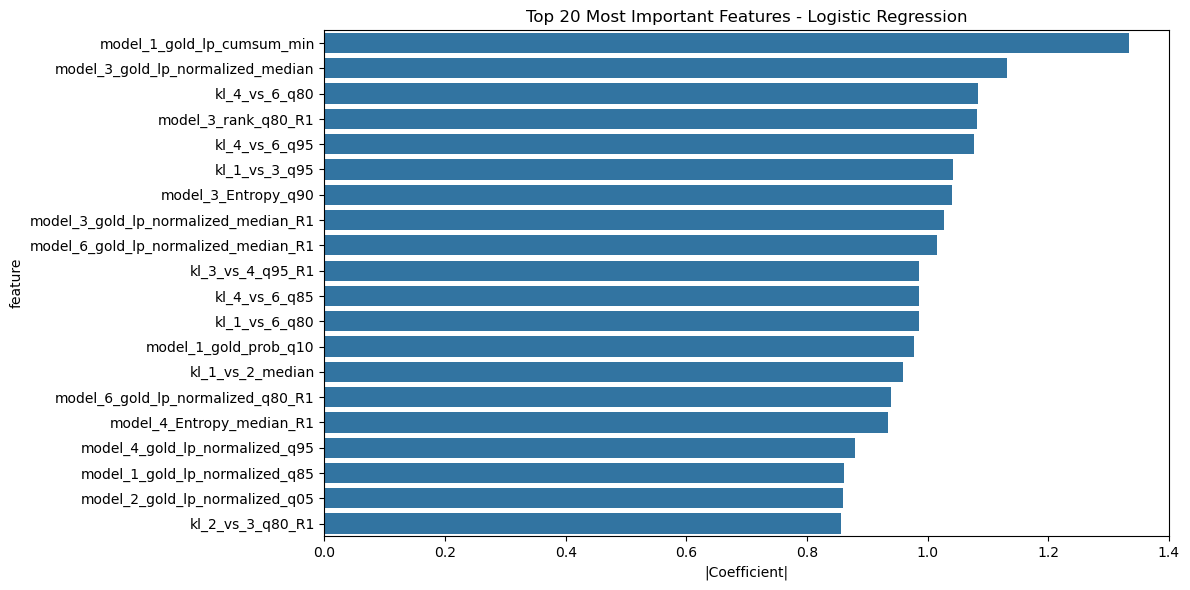


Top 10 Most Important Features and their coefficients:
                                   feature  coefficient
733             model_1_gold_lp_cumsum_min     1.333690
969      model_3_gold_lp_normalized_median    -1.131977
1355                         kl_4_vs_6_q80    -1.082839
233                    model_3_rank_q80_R1    -1.082137
1352                         kl_4_vs_6_q95     1.077436
1216                         kl_1_vs_3_q95     1.042752
928                    model_3_Entropy_q90    -1.040669
289   model_3_gold_lp_normalized_median_R1    -1.026681
493   model_6_gold_lp_normalized_median_R1    -1.014813
638                       kl_3_vs_4_q95_R1    -0.985345

AUC Scores for each class:
fact: 0.930
hallucination: 0.930

Model intercept: [-10.87508663]
Number of iterations needed: [229]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the data
X = df_clean.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y = df_clean['Final_label']

# Print original labels
print("Original unique labels:", y.unique())

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print split sizes
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution:")
print("Training set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

# 4. Create and train the model
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# 6. Print model coefficients
print("\nModel classes:", log_reg.classes_)

# 7. Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 9. Plot ROC curve
plt.figure(figsize=(8, 6))

# Get unique classes
classes = log_reg.classes_

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_name, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 10. Feature importance (using absolute values of coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(log_reg.coef_[0])  # Use absolute values
})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='coefficient', y='feature')
plt.title('Top 20 Most Important Features - Logistic Regression')
plt.xlabel('|Coefficient|')
plt.tight_layout()
plt.show()

# 11. Print top 10 features and their coefficients
print("\nTop 10 Most Important Features and their coefficients:")
top_features = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]  # Original coefficients with signs
})
top_features['abs_coef'] = np.abs(top_features['coefficient'])
top_features = top_features.sort_values('abs_coef', ascending=False)
print(top_features[['feature', 'coefficient']].head(10))

print("\nAUC Scores for each class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {roc_auc[i]:.3f}")

# 12. Model parameters
print("\nModel intercept:", log_reg.intercept_)
print("Number of iterations needed:", log_reg.n_iter_)

## PCA + Features Random forest

<>:123: SyntaxWarning:

invalid escape sequence '\d'

<>:123: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipykernel_324620/2501332803.py:123: SyntaxWarning:

invalid escape sequence '\d'



Shape of combined features: (1938, 2720)
Number of original features: 1363
Number of PCA features: 1360

Training set size: 1550
Test set size: 388

Class distribution:
Training set:
 Final_label
fact             0.788387
hallucination    0.211613
Name: proportion, dtype: float64

Test set:
 Final_label
fact             0.78866
hallucination    0.21134
Name: proportion, dtype: float64

Tree Depth Statistics:
Average depth: 15.0
Maximum depth: 21
Minimum depth: 11

Classification Report:
               precision    recall  f1-score   support

         fact       0.92      0.93      0.93       306
hallucination       0.74      0.68      0.71        82

     accuracy                           0.88       388
    macro avg       0.83      0.81      0.82       388
 weighted avg       0.88      0.88      0.88       388



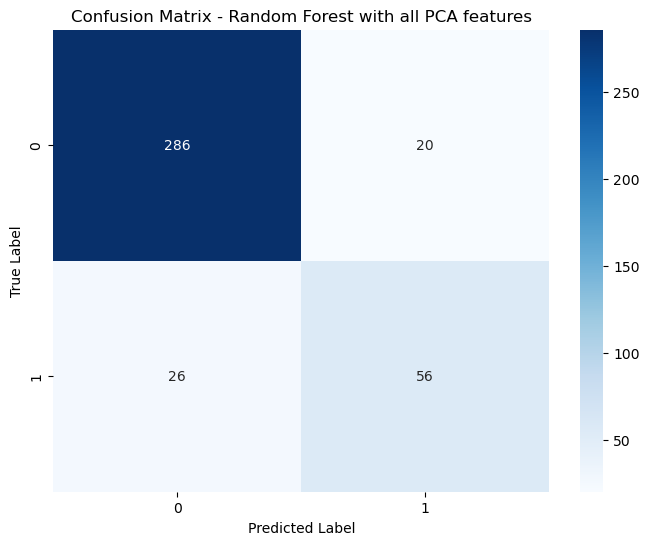

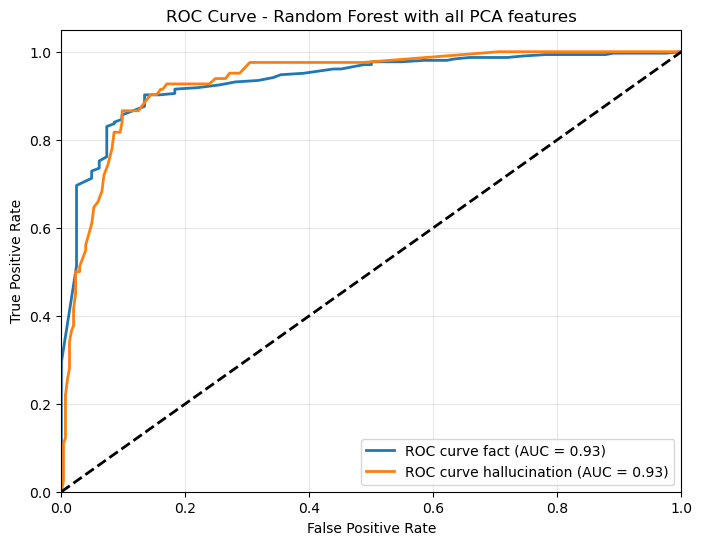

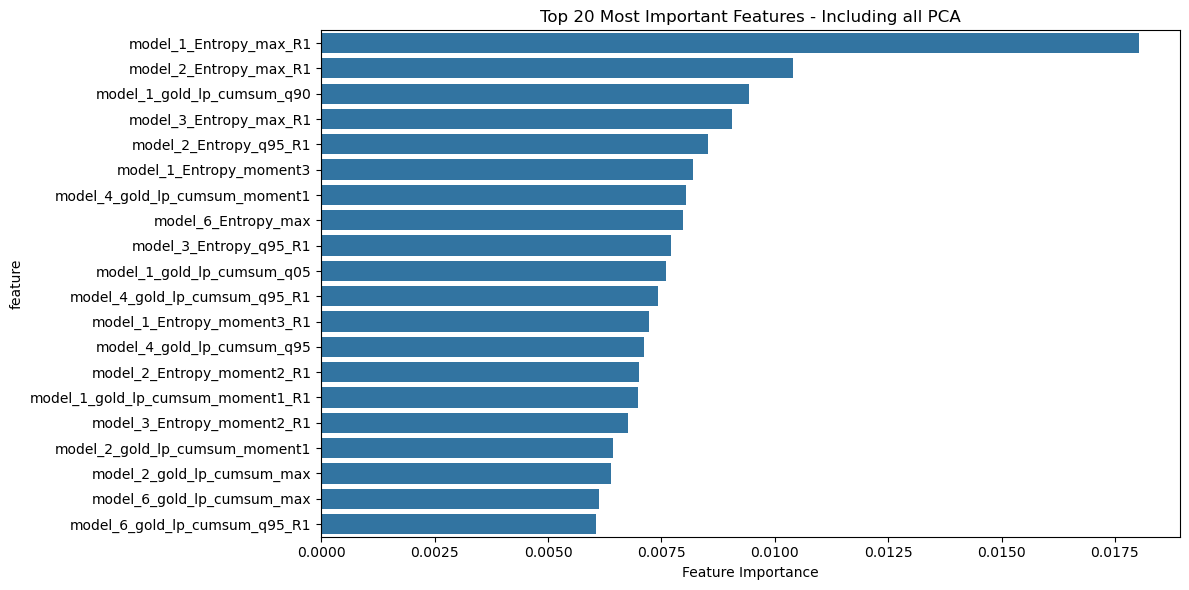


Top 10 Most Important Features:
                             feature  importance
35            model_1_Entropy_max_R1    0.018032
137           model_2_Entropy_max_R1    0.010402
741       model_1_gold_lp_cumsum_q90    0.009426
239           model_3_Entropy_max_R1    0.009051
145           model_2_Entropy_q95_R1    0.008526
720          model_1_Entropy_moment3    0.008201
1041  model_4_gold_lp_cumsum_moment1    0.008046
1123             model_6_Entropy_max    0.007975
247           model_3_Entropy_q95_R1    0.007704
747       model_1_gold_lp_cumsum_q05    0.007606

AUC Scores for each class:
fact: 0.934
hallucination: 0.934

Top 10 PCA Features Importance Ranking:
PC57: Importance = 0.0015, Rank = 113
PC32: Importance = 0.0015, Rank = 116
PC208: Importance = 0.0011, Rank = 135
PC1006: Importance = 0.0009, Rank = 150
PC176: Importance = 0.0009, Rank = 151
PC2: Importance = 0.0009, Rank = 163
PC190: Importance = 0.0009, Rank = 164
PC1135: Importance = 0.0009, Rank = 167
PC80: Importance

/tmp/ipykernel_324620/2501332803.py:123: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



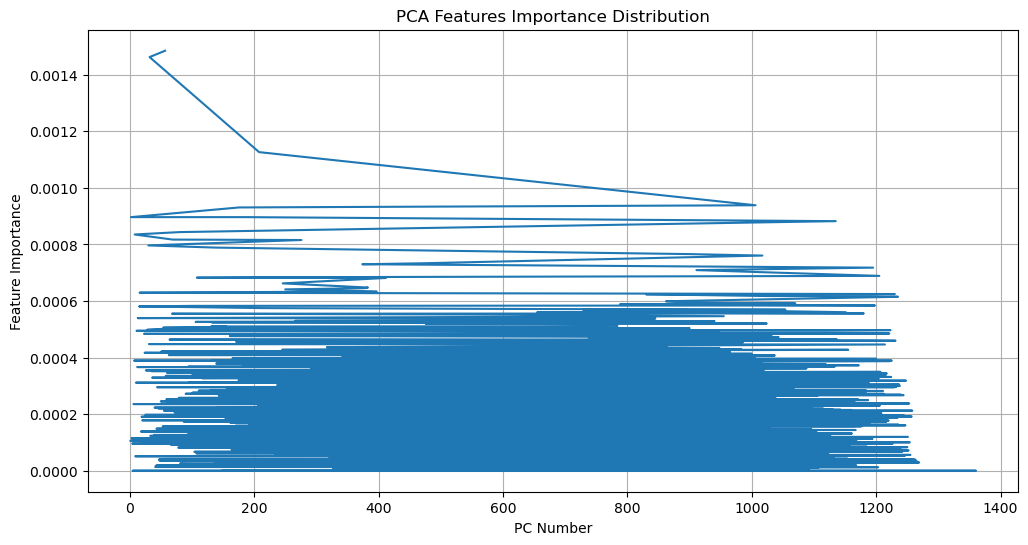

In [15]:
# 1. Prepare the combined dataset
# Get all PCs
pca_features = pca_df[[col for col in pca_df.columns if col.startswith('PC')]].copy()

# Combine original features with PCA
X_combined = pd.concat([
    df_clean.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1),  # Original features
    pca_features  # All PCA features
], axis=1)

y = df_clean['Final_label']

print("Shape of combined features:", X_combined.shape)
print("Number of original features:", len(df_clean.drop(['label', 'source_file', 'file_path'], axis=1).columns))
print("Number of PCA features:", len(pca_features.columns))

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# Print split sizes
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution:")
print("Training set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

# 3. Create and train the model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

# Get maximum depth of trees
max_depths = [estimator.get_depth() for estimator in rf_classifier.estimators_]
print("\nTree Depth Statistics:")
print(f"Average depth: {np.mean(max_depths):.1f}")
print(f"Maximum depth: {np.max(max_depths)}")
print(f"Minimum depth: {np.min(max_depths)}")

# 4. Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# 5. Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest with all PCA features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 7. Plot ROC curve
plt.figure(figsize=(8, 6))

# Get unique classes
classes = rf_classifier.classes_

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_name, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest with all PCA features')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 8. Feature importance (top 20)
feature_importance = pd.DataFrame({
    'feature': X_combined.columns,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features - Including all PCA')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 9. Print top 10 features and AUC scores
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

print("\nAUC Scores for each class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {roc_auc[i]:.3f}")

# 10. Analyze importance of PCA features
pca_importance = feature_importance[feature_importance['feature'].str.startswith('PC')]
print("\nTop 10 PCA Features Importance Ranking:")
for idx, row in pca_importance.head(10).iterrows():
    print(f"{row['feature']}: Importance = {row['importance']:.4f}, Rank = {feature_importance.index.get_loc(idx) + 1}")

# 11. Plot PCA features importance distribution
plt.figure(figsize=(12, 6))
pca_importance['PC_number'] = pca_importance['feature'].str.extract('(\d+)').astype(int)
plt.plot(pca_importance['PC_number'], pca_importance['importance'])
plt.title('PCA Features Importance Distribution')
plt.xlabel('PC Number')
plt.ylabel('Feature Importance')
plt.grid(True)
plt.show()

## XGBoost

Label encoding mapping:
fact -> 0
hallucination -> 1

Training set size: 1550
Test set size: 388

Class distribution:
Training set:
 0    0.788387
1    0.211613
Name: proportion, dtype: float64

Test set:
 0    0.78866
1    0.21134
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

         fact       0.91      0.94      0.93       306
hallucination       0.75      0.67      0.71        82

     accuracy                           0.88       388
    macro avg       0.83      0.81      0.82       388
 weighted avg       0.88      0.88      0.88       388



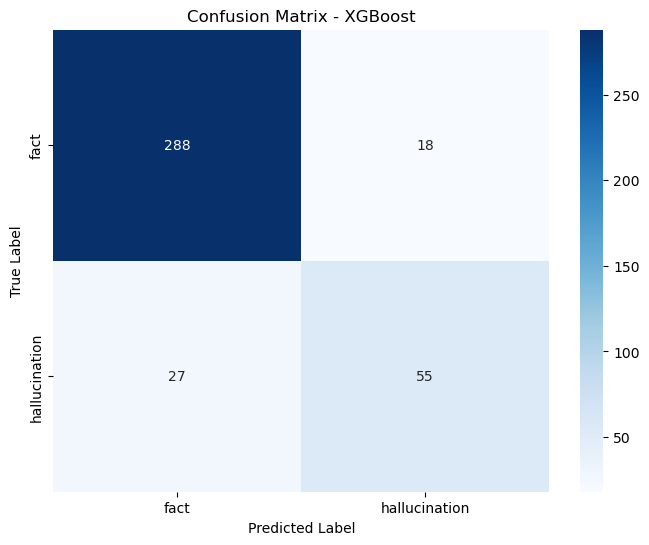

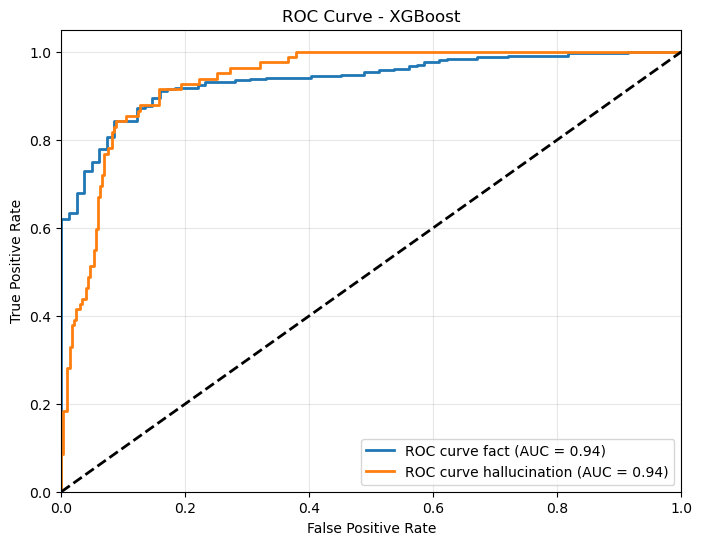

<Figure size 1200x600 with 0 Axes>

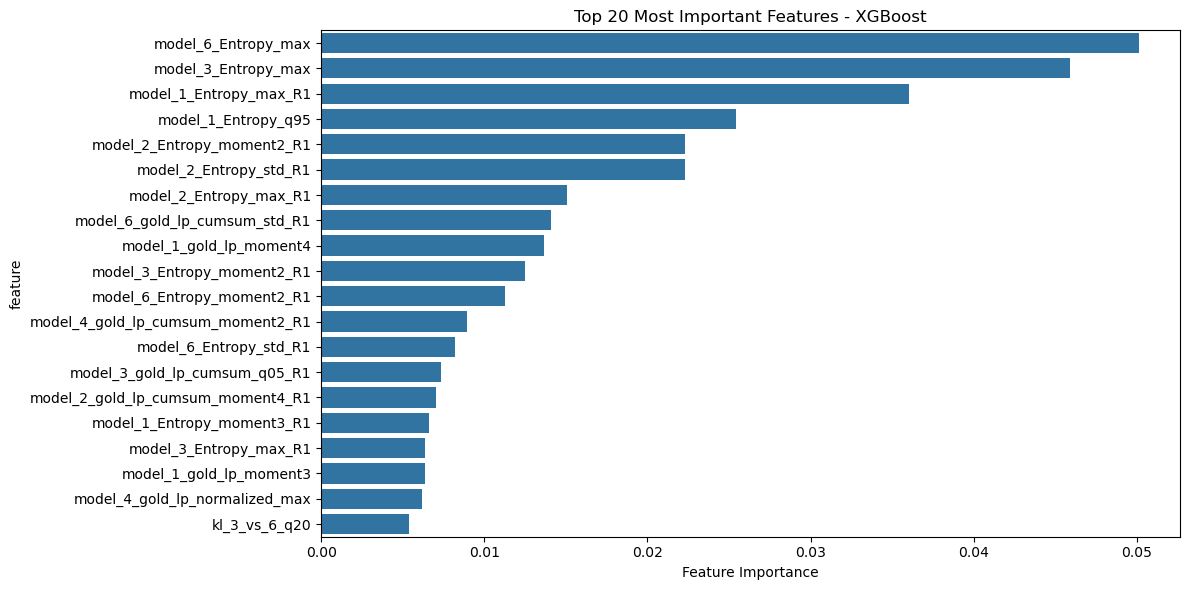


Top 10 Most Important Features:
                            feature  importance
1123            model_6_Entropy_max    0.050150
919             model_3_Entropy_max    0.045887
35           model_1_Entropy_max_R1    0.036070
723             model_1_Entropy_q95    0.025422
141      model_2_Entropy_moment2_R1    0.022328
139          model_2_Entropy_std_R1    0.022322
137          model_2_Entropy_max_R1    0.015044
462   model_6_gold_lp_cumsum_std_R1    0.014089
687         model_1_gold_lp_moment4    0.013660
243      model_3_Entropy_moment2_R1    0.012469

AUC Scores for each class:
fact: 0.937
hallucination: 0.937


In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the data
X = df_clean.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y = df_clean['Final_label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print encoding mapping
print("Label encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Print split sizes
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution:")
print("Training set:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nTest set:\n", pd.Series(y_test).value_counts(normalize=True))

# 3. Create and train the model
xgb_classifier = xgb.XGBClassifier(
    n_estimators=5000,
    learning_rate=0.005,
    max_depth=3,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# 4. Make predictions
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)

# Convert predictions back to original labels for display
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# 5. Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# 6. Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_original, y_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 7. Plot ROC curve
plt.figure(figsize=(8, 6))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 8. Feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features - XGBoost')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 9. Print top 10 features and AUC scores
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

print("\nAUC Scores for each class:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {roc_auc[i]:.3f}")

## Imnproving XGBoost

Label encoding mapping:
fact -> 0
hallucination -> 1

Training set size: 1550
Test set size: 388

Class distribution:
Training set:
 0    0.788387
1    0.211613
Name: proportion, dtype: float64

Test set:
 0    0.78866
1    0.21134
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

         fact       0.91      0.93      0.92       306
hallucination       0.71      0.67      0.69        82

     accuracy                           0.87       388
    macro avg       0.81      0.80      0.81       388
 weighted avg       0.87      0.87      0.87       388



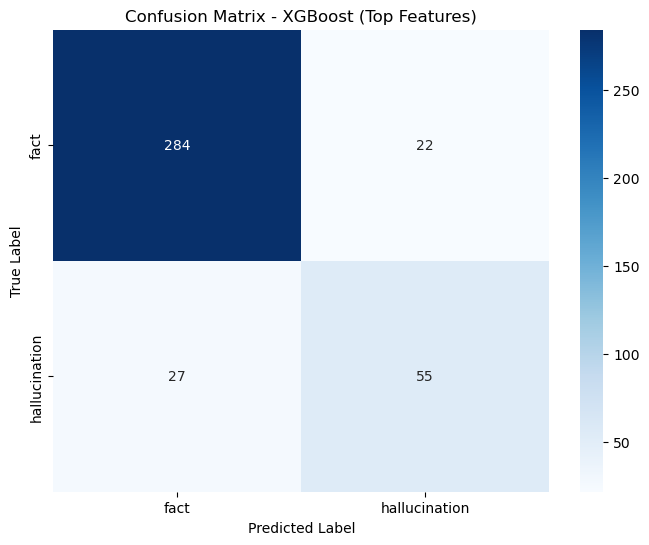

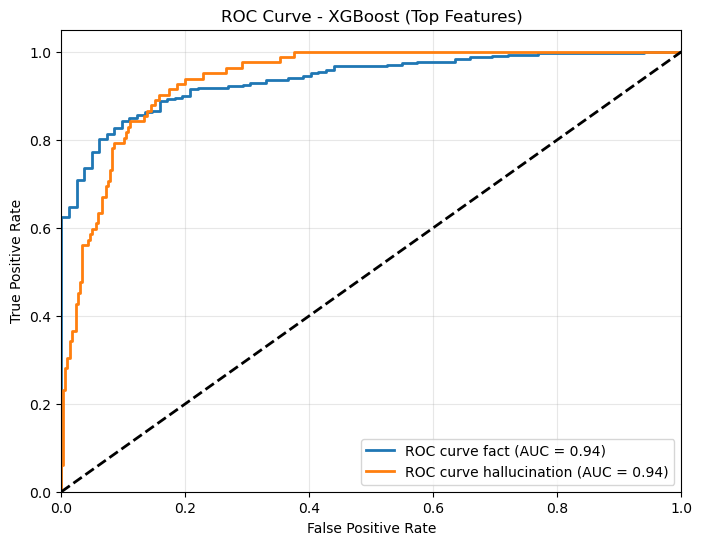

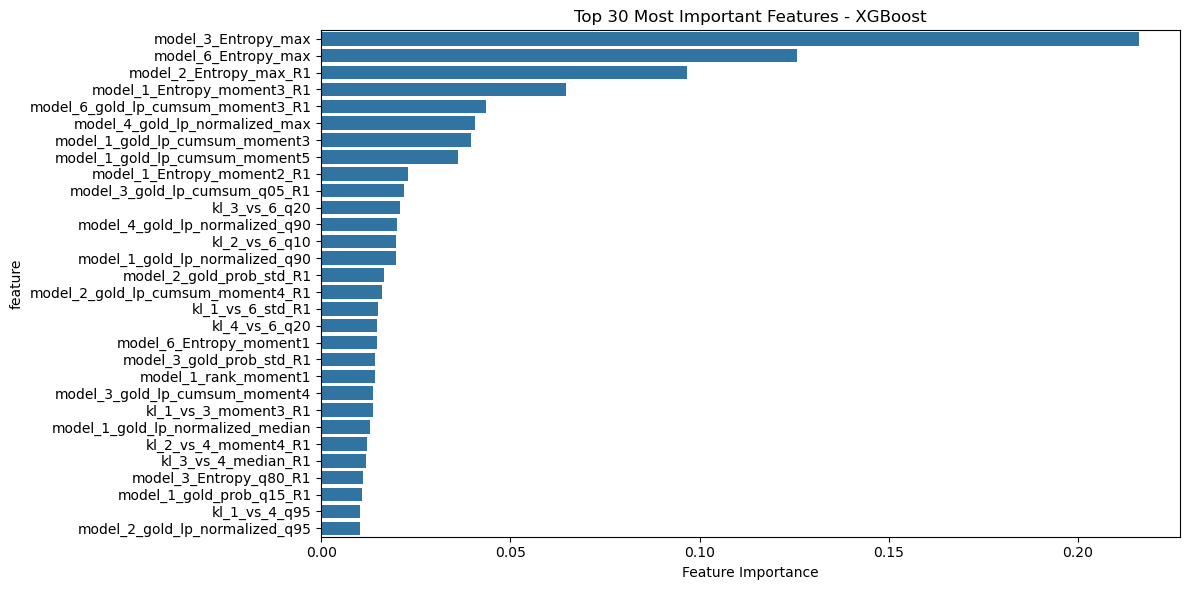


AUC Scores for each class:
fact: 0.937
hallucination: 0.937


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. First, train a model to get feature importance
X = df_clean.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y = df_clean['Final_label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print encoding mapping
print("Label encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# Initial split to get feature importance
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train initial model to get feature importance
initial_model = xgb.XGBClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': initial_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Select top N most important features
N_FEATURES = 30
top_features = feature_importance['feature'].head(N_FEATURES).tolist()

# print(f"\nSelected top {N_FEATURES} features:")
# for i, (feature, importance) in enumerate(feature_importance.head(N_FEATURES).values, 1):
#     print(f"{i}. {feature}: {importance:.4f}")

# 2. Train final model with selected features
X_selected = X[top_features]

# Split the data with selected features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Print split sizes
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution:")
print("Training set:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nTest set:\n", pd.Series(y_test).value_counts(normalize=True))

# Create and train the model
xgb_classifier = xgb.XGBClassifier(
    n_estimators=5000,
    learning_rate=0.005,
    max_depth=3,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)

# Convert predictions back to original labels
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_original, y_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - XGBoost (Top Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Top Features)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Plot feature importance for selected features
plt.figure(figsize=(12, 6))
feature_importance_selected = pd.DataFrame({
    'feature': top_features,
    'importance': xgb_classifier.feature_importances_
})
feature_importance_selected = feature_importance_selected.sort_values('importance', ascending=False)

sns.barplot(data=feature_importance_selected, x='importance', y='feature')
plt.title(f'Top {N_FEATURES} Most Important Features - XGBoost')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print AUC scores
print("\nAUC Scores for each class:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {roc_auc[i]:.3f}")

## Logistic regresion + Random Forest + XGBoost

Label encoding mapping:
fact -> 0
hallucination -> 1
Training stacking classifier...


/home/4481281/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/4481281/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-


Classification Report:
               precision    recall  f1-score   support

         fact       0.91      0.93      0.92       306
hallucination       0.73      0.66      0.69        82

     accuracy                           0.88       388
    macro avg       0.82      0.80      0.81       388
 weighted avg       0.87      0.88      0.87       388



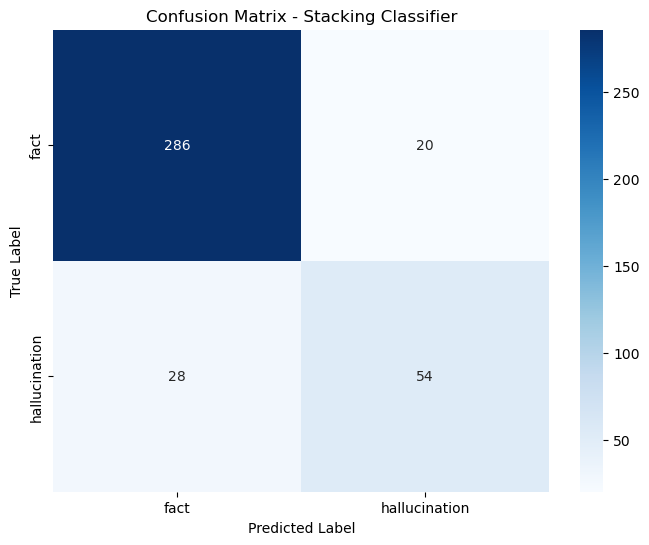

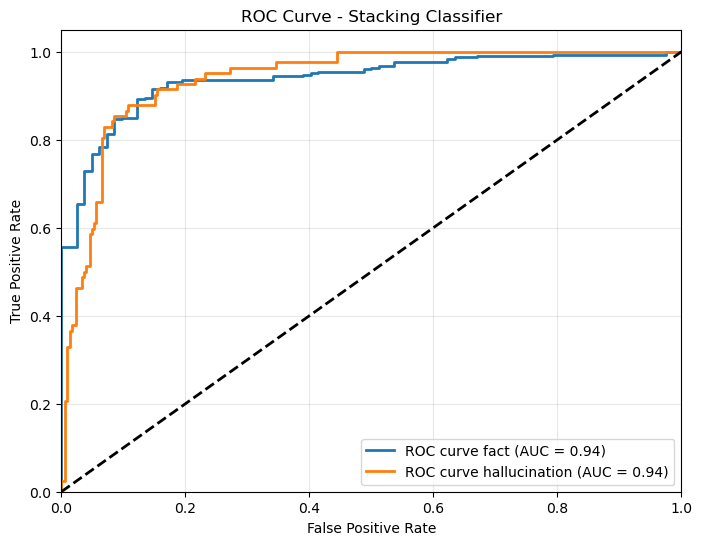


Comparing individual model performance:


/home/4481281/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


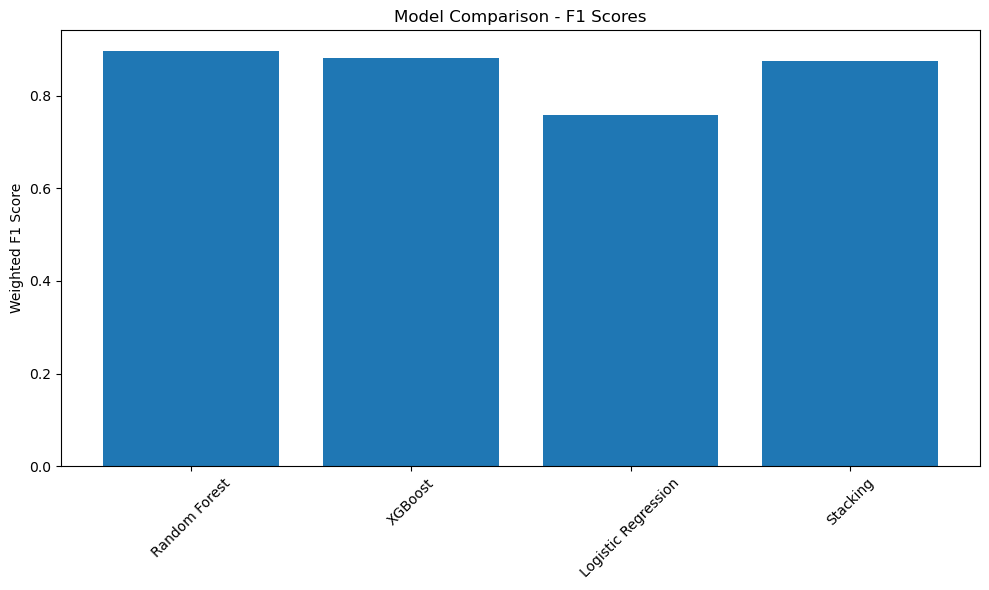


Detailed F1 Scores:
Random Forest: 0.896
XGBoost: 0.881
Logistic Regression: 0.757
Stacking: 0.874

AUC Scores for Stacking Classifier:
fact: 0.938
hallucination: 0.938


In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the data
X = df_clean.drop(['label', 'source_file', 'file_path', 'nct_number', 'counterfactual', 'Final_label'], axis=1)
y = df_clean['Final_label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print encoding mapping
print("Label encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Define base models
rf_classifier = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,  # No limit on depth
    min_samples_split=2,  # Split until 2 samples remain
    min_samples_leaf=1,   # Allow leaves with 1 sample
    random_state=42,
    n_jobs=-1
)

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=5000,
    learning_rate=0.005,
    max_depth=3,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# 4. Define the stacking classifier
estimators = [
    ('rf', rf_classifier),
    ('xgb', xgb_classifier),
    ('lr', log_reg)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 5. Fit the stacking classifier
print("Training stacking classifier...")
stack.fit(X_train, y_train)

# 6. Make predictions
y_pred = stack.predict(X_test)
y_pred_proba = stack.predict_proba(X_test)

# Convert predictions back to original labels
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# 7. Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# 8. Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_original, y_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Stacking Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 9. Plot ROC curve
plt.figure(figsize=(8, 6))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 10. Compare with individual models
print("\nComparing individual model performance:")

models = {
    'Random Forest': rf_classifier,
    'XGBoost': xgb_classifier,
    'Logistic Regression': log_reg,
    'Stacking': stack
}

results = {}

for name, model in models.items():
    if name != 'Stacking':
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_original = le.inverse_transform(y_pred)
    score = classification_report(y_test_original, y_pred_original, output_dict=True)
    results[name] = score['weighted avg']['f1-score']

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison - F1 Scores')
plt.ylabel('Weighted F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed F1 Scores:")
for name, score in results.items():
    print(f"{name}: {score:.3f}")

print("\nAUC Scores for Stacking Classifier:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {roc_auc[i]:.3f}")